In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [35]:
data_filename = 'data/13_102.5_104.5_0.1.npy'
amplitude = np.load(data_filename)
summed_z = np.average(np.abs(amplitude), 2)

Here is the fundamental mode.

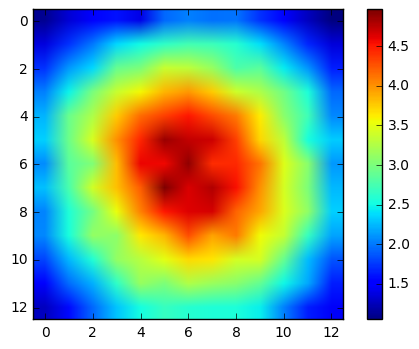

In [36]:
plt.imshow(summed_z)
plt.colorbar()

Here we generate a fit to this:

In [37]:
f1 = lambda x: 0.75*(np.cos(x)+.333*np.cos(3*x))

Here we calculate the appropriate range of x values. We do not go all the way to the edge (i.e., $\pm\pi/2$), as the sensor does not. The sensor only goes to 6000 steps out of a total $7950\pm50$ steps. 

In [46]:
fraction_to_edge = 5000./7950
x = np.linspace(
    -np.pi/2.*fraction_to_edge,
    np.pi/2.*fraction_to_edge,
    13)
y = np.copy(x)
fake_amplitude = np.dot(f1(x[:, None]), f1(x[None, :]))

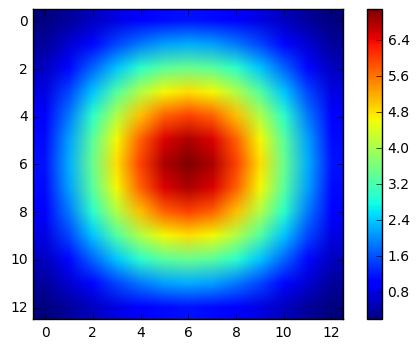

In [47]:
plt.imshow(7.09340111*fake_amplitude)
plt.colorbar()

In [48]:
minimize(lambda a: np.sum(np.square(a*fake_amplitude-summed_z)), [1])

      fun: 167.98947007232402
 hess_inv: array([[ 0.01411495]])
      jac: array([  3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([ 6.41428745])

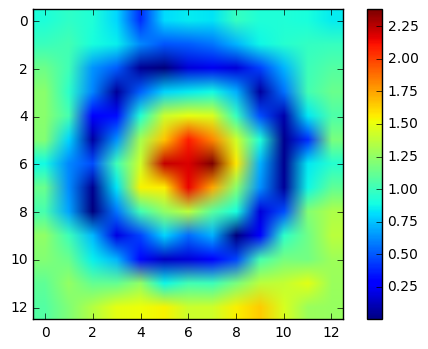

In [49]:
plt.imshow(np.abs(7.09340111*fake_amplitude-summed_z))
plt.colorbar()